In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [45]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import tensorflow as tf
import gc
gc.enable()

In [46]:
import os
print(os.listdir('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg'))

['user_e.csv', 'user_d.csv', 'user_a.csv', 'user_c.csv', 'user_b.csv', '.ipynb_checkpoints']


In [47]:
file_path = '/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_a.csv'

df = pd.read_csv(file_path)
print(df.head())

   Values  POW.AF3.Theta  POW.AF3.Alpha  POW.AF3.BetaL  POW.AF3.BetaH  \
0     0.0     177.545120      44.201519      52.901443     111.848244   
1     0.0     134.393936      36.722378      58.060577     138.923920   
2     0.0     101.179245      32.584496      76.664604     157.986481   
3     0.0      86.372566      32.843426     103.308090     163.523895   
4     0.0      91.219887      38.426960     129.014969     155.117188   

   POW.AF3.Gamma  POW.T7.Theta  POW.T7.Alpha  POW.T7.BetaL  POW.T7.BetaH  ...  \
0     118.630608    146.543518    112.673729     73.056519     93.528786  ...   
1     143.085968    125.963150    112.438896     80.644882    114.150826  ...   
2     169.948532    105.953514    106.995354     92.989960    127.571053  ...   
3     192.913834     89.338104    100.264130    103.970276    130.280136  ...   
4     207.057343     78.061356     97.215256    108.936523    122.467529  ...   

   POW.T8.Theta  POW.T8.Alpha  POW.T8.BetaL  POW.T8.BetaH  POW.T8.Gamma  \

In [49]:
print(df.info()) 
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15282 entries, 0 to 15281
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Values         15282 non-null  float64
 1   POW.AF3.Theta  15282 non-null  float64
 2   POW.AF3.Alpha  15282 non-null  float64
 3   POW.AF3.BetaL  15282 non-null  float64
 4   POW.AF3.BetaH  15282 non-null  float64
 5   POW.AF3.Gamma  15282 non-null  float64
 6   POW.T7.Theta   15282 non-null  float64
 7   POW.T7.Alpha   15282 non-null  float64
 8   POW.T7.BetaL   15282 non-null  float64
 9   POW.T7.BetaH   15282 non-null  float64
 10  POW.T7.Gamma   15282 non-null  float64
 11  POW.Pz.Theta   15282 non-null  float64
 12  POW.Pz.Alpha   15282 non-null  float64
 13  POW.Pz.BetaL   15282 non-null  float64
 14  POW.Pz.BetaH   15282 non-null  float64
 15  POW.Pz.Gamma   15282 non-null  float64
 16  POW.T8.Theta   15282 non-null  float64
 17  POW.T8.Alpha   15282 non-null  float64
 18  POW.T8

In [50]:
print(df['Values'].value_counts())

Values
0.0    5225
2.0    5057
1.0    5000
Name: count, dtype: int64


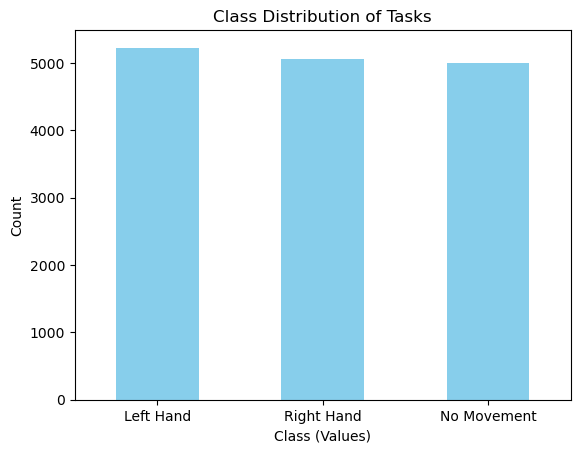

In [12]:
# Visualize the class distribution
df['Values'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Tasks')
plt.xlabel('Class (Values)')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Left Hand', 'Right Hand', 'No Movement'], rotation=0)
plt.show()


In [ ]:
# There is a pretty balanced count of target variables (left = 0, right = 1, no movement = 2); this will make the process of training the neural networks more fair since there is no bias towards one target

In [51]:
col = df.columns       # .columns gives columns names in data
features = col[1:]
target='Values'
print(features)

Index(['POW.AF3.Theta', 'POW.AF3.Alpha', 'POW.AF3.BetaL', 'POW.AF3.BetaH',
       'POW.AF3.Gamma', 'POW.T7.Theta', 'POW.T7.Alpha', 'POW.T7.BetaL',
       'POW.T7.BetaH', 'POW.T7.Gamma', 'POW.Pz.Theta', 'POW.Pz.Alpha',
       'POW.Pz.BetaL', 'POW.Pz.BetaH', 'POW.Pz.Gamma', 'POW.T8.Theta',
       'POW.T8.Alpha', 'POW.T8.BetaL', 'POW.T8.BetaH', 'POW.T8.Gamma',
       'POW.AF4.Theta', 'POW.AF4.Alpha', 'POW.AF4.BetaL', 'POW.AF4.BetaH',
       'POW.AF4.Gamma'],
      dtype='object')


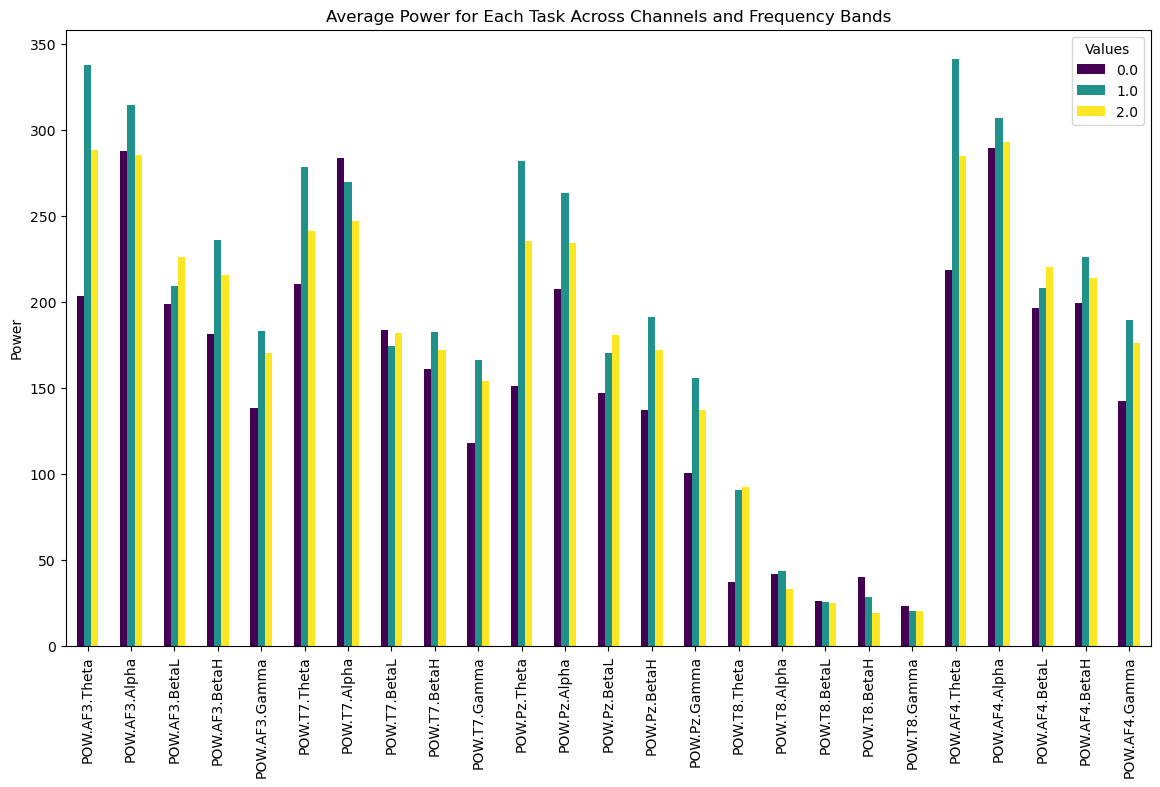

In [13]:
# Calculate means grouped by class
grouped_means = df.groupby('Values').mean()

# Transpose for better readability
grouped_means.T.plot(kind='bar', figsize=(14, 8), cmap='viridis')
plt.title('Average Power for Each Task Across Channels and Frequency Bands')
plt.ylabel('Power')
plt.show()


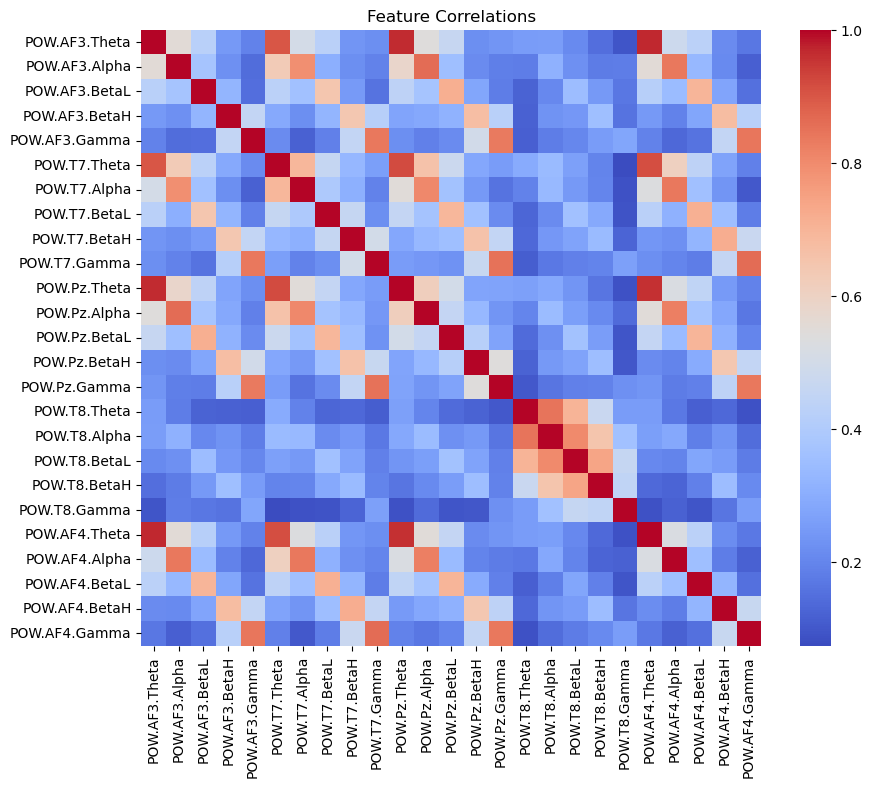

In [17]:
# Correlation heatmap
correlations = df.iloc[:, 1:].corr()  # Exclude the 'Values' column
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap='coolwarm', annot=False)
plt.title('Feature Correlations')
plt.show()


In [75]:
list_cor = pd.DataFrame(df[features].corr().unstack().abs().sort_values().drop_duplicates())
list_cor.columns = ['correlation_index']
list_corr_high = list(list_cor[-10:-1]['correlation_index'].index)
list_corr_high

[('POW.T7.Gamma', 'POW.Pz.Gamma'),
 ('POW.AF3.Alpha', 'POW.Pz.Alpha'),
 ('POW.T7.Gamma', 'POW.AF4.Gamma'),
 ('POW.AF3.Theta', 'POW.T7.Theta'),
 ('POW.T7.Theta', 'POW.AF4.Theta'),
 ('POW.T7.Theta', 'POW.Pz.Theta'),
 ('POW.AF4.Theta', 'POW.Pz.Theta'),
 ('POW.AF3.Theta', 'POW.Pz.Theta'),
 ('POW.AF3.Theta', 'POW.AF4.Theta')]

In [71]:
total = df[features].isnull().sum().sort_values(ascending = False)
percent = (df[features].isnull().sum()/df[features].isnull().count()*100).sort_values(ascending = False)
missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
POW.AF3.Theta,0,0.0
POW.Pz.BetaH,0,0.0
POW.AF4.BetaH,0,0.0
POW.AF4.BetaL,0,0.0
POW.AF4.Alpha,0,0.0
POW.AF4.Theta,0,0.0
POW.T8.Gamma,0,0.0
POW.T8.BetaH,0,0.0
POW.T8.BetaL,0,0.0
POW.T8.Alpha,0,0.0
